# Análise de séries temporais

## Entendendo o problema

Uma rede de restaurantes está com dificuldades em realizar o planejamento do negócio como um todo. A percepção é de que em alguns dias o movimento é muito baixo, fazendo com que os garçons fiquem muito ociosos. Em outros dias, o movimento é muito alto, e a quantidade de garçons parece ser insuficiente para atender a todas as pessoas.

Vamos realizar uma análise nos dados de **quantidade de clientes por dia nos restaurantes** para melhorar o planejamento de atendimento na rede de restaurantes.

### Fazendo a leitura dos dados

O primeiro passo é fazer a leitura da base de dados, a partir do arquivo `qtd_clientes_restaurantes.csv`. Vamos fazer a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) da biblioteca `pandas`.

In [71]:
import pandas as pd

In [72]:
dados = pd.read_csv('/content/clientes_restaurantes.csv')

In [73]:
dados

,data,Chimi & Churri,Assa Frão
0,1/1/2016,65.0,139.0
1,1/2/2016,24.0,85.0
2,1/3/2016,24.0,81.0
3,1/4/2016,23.0,32.0
4,1/5/2016,2.0,43.0
...,...,...,...
473,4/18/2017,30.0,18.0
474,4/19/2017,20.0,18.0
475,4/20/2017,22.0,46.0
476,4/21/2017,38.0,38.0


O `DataFrame` apresenta informações de data e quantidade de clientes de dois restaurantes ao longo dos dias, o **Chimi & Churri** e o **Assa Frão**. Precisamos fazer uma análise desses dados de restaurante para aprimorar o planejamento da quantidade de garçons que precisam ser alocados em cada dia.

Vamos ver algumas informações adicionais dos dados, como presença de dados nulos e tipos de dados em cada coluna, usando o método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [74]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   data            478 non-null    object 
 1   Chimi & Churri  476 non-null    float64
 2   Assa Frão       477 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.3+ KB


A coluna `data` é do tipo `object`, portanto está sendo entendida como um texto. Vamos aplicar uma transformação da coluna para o formato `datetime` e definir essa informação como o índice do `DataFrame`.

In [75]:
dados['data'] = pd.to_datetime(dados['data'])
dados.set_index('data', inplace = True)

In [76]:
dados

,Chimi & Churri,Assa Frão
data,,
2016-01-01,65.0,139.0
2016-01-02,24.0,85.0
2016-01-03,24.0,81.0
2016-01-04,23.0,32.0
2016-01-05,2.0,43.0
...,...,...
2017-04-18,30.0,18.0
2017-04-19,20.0,18.0
2017-04-20,22.0,46.0


A base de dados já está carregada e já possui os dados de data como sendo o índice do `DataFrame`.

### Encontrando dados nulos

O `DataFrame` apresenta dados nulos que podem prejudicar a análise. Vamos identificar esses dados nulos e ver quais tipos de tratamento podemos realizar nesses dados.

In [77]:
dados['Chimi & Churri'][dados['Chimi & Churri'].isna()]

data
2016-04-05   NaN
2016-09-17   NaN
Name: Chimi & Churri, dtype: float64

In [78]:
import matplotlib.pyplot as plt

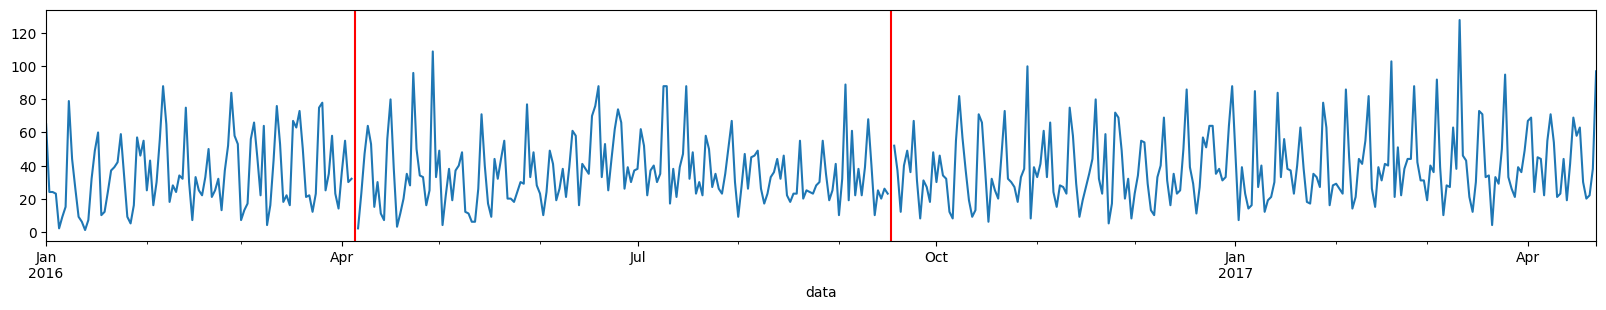

In [79]:
dados['Chimi & Churri'].plot(figsize = (20,3))
plt.axvline(x = dados['Chimi & Churri'][dados['Chimi & Churri'].isna()].index[0], color = 'red')
plt.axvline(x = dados['Chimi & Churri'][dados['Chimi & Churri'].isna()].index[1], color = 'red');

In [80]:
dados['Assa Frão'][dados['Assa Frão'].isna()]

data
2016-11-24   NaN
Name: Assa Frão, dtype: float64

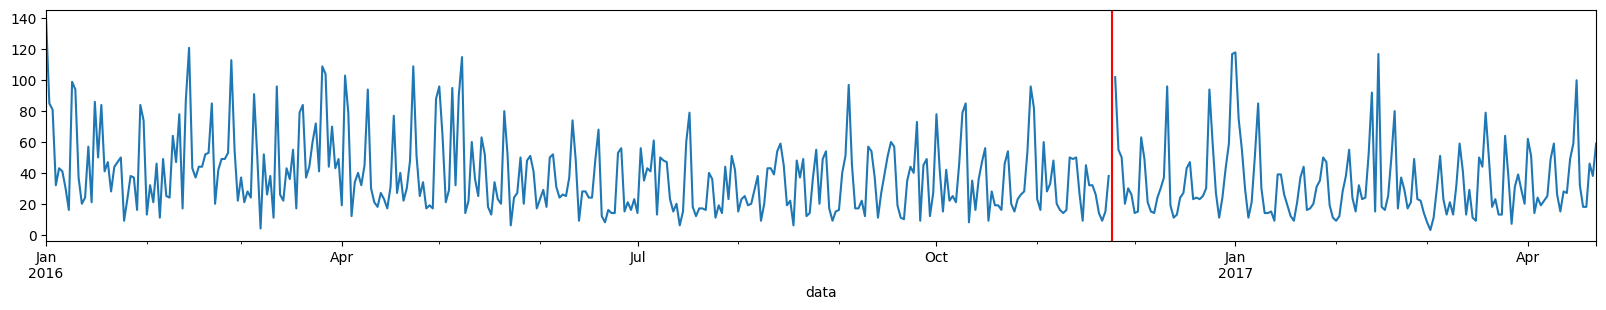

In [81]:
dados['Assa Frão'].plot(figsize = (20,3))
plt.axvline(x = dados['Assa Frão'][dados['Assa Frão'].isna()].index[0], color = 'red');

### Tratando os dados nulos

Existem diversas maneiras de realizar o tratamento de dados nulos em uma base de dados. Sem dúvida a melhor escolha é procurar o setor responsável por alimentar a base de dados para verificar se é possível recuperar essa informação de alguma forma e preencher o valor na base de dados para que a informação fique completa.

Caso não seja possível, de acordo com cada caso, podemos utilizar alguma estratégia de preenchimento dos dados ou remover o registro da base de dados somente no momento de análise. As estratégias mais usuais seriam:

- Preenchimento do dado nulo com a média/mediana/moda da variável.

Em séries temporais:

- Preencher com o valor anterior
- Preencher com o valor posterior
- Preencher com o ponto médio do valor anterior e posterior

In [82]:
dados = dados.interpolate()

In [83]:
dados.loc['2016-04-04':'2016-04-06']

,Chimi & Churri,Assa Frão
data,,
2016-04-04,32.0,12.0
2016-04-05,17.0,34.0
2016-04-06,2.0,40.0


In [84]:
dados.loc['2016-09-16':'2016-09-18']

,Chimi & Churri,Assa Frão
data,,
2016-09-16,23.0,51.0
2016-09-17,37.5,60.0
2016-09-18,52.0,57.0


In [85]:
dados.loc['2016-11-23':'2016-11-25']

,Chimi & Churri,Assa Frão
data,,
2016-11-23,5.0,38.0
2016-11-24,17.0,70.0
2016-11-25,72.0,102.0


## Explorando os dados

### Visualizando a distribuição com histograma

Agora que temos todos os dados tratados, podemos começar a analisar os dados dos restaurantes. A primeira análise que podemos fazer é entender como é a distribuição da quantidade de clientes em cada restaurante. Qual é a quantidade de clientes mais comum e menos comum?

In [86]:
dados = dados.astype(int)
dados

,Chimi & Churri,Assa Frão
data,,
2016-01-01,65,139
2016-01-02,24,85
2016-01-03,24,81
2016-01-04,23,32
2016-01-05,2,43
...,...,...
2017-04-18,30,18
2017-04-19,20,18
2017-04-20,22,46


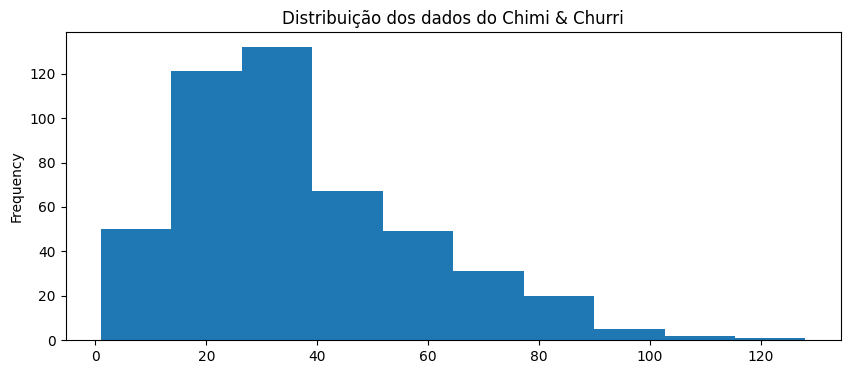

In [87]:
dados['Chimi & Churri'].plot(kind = 'hist', title = 'Distribuição dos dados do Chimi & Churri', figsize = (10, 4));

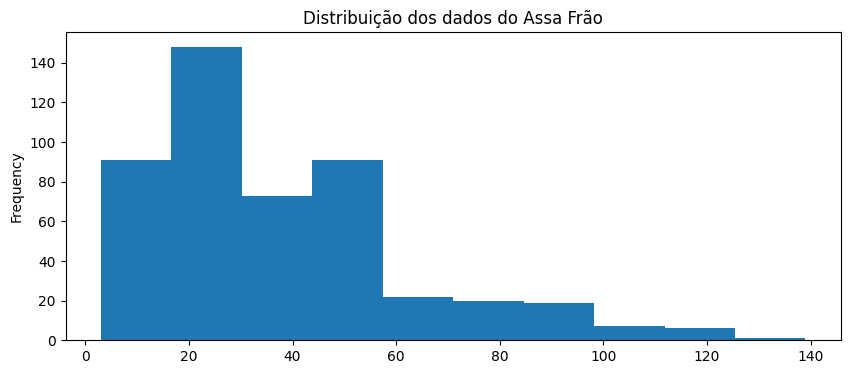

In [88]:
dados['Assa Frão'].plot(kind = 'hist', title = 'Distribuição dos dados do Assa Frão', figsize = (10, 4));

### Visualizando a distribuição com boxplot

Agora que temos uma ideia mais geral de como se comporta a distribuição da quantidade de clientes nos restaurantes, vamos explorar mais detalhadamente algumas estatísticas a respeito dos dados. Qual a quantidade mínima e máxima de clientes de cada restaurante e qual o valor médio de clientes? Será que existem dias com valores muito discrepantes?

In [89]:
dados.describe()

,Chimi & Churri,Assa Frão
count,478.000000,478.000000
mean,37.451883,37.679916
std,21.433061,24.619708
min,1.000000,3.000000
25%,22.250000,19.000000
50%,33.000000,30.500000
75%,49.000000,50.000000
max,128.000000,139.000000


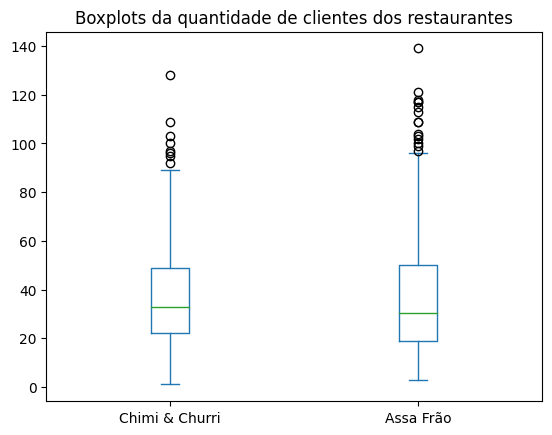

In [90]:
dados.plot(kind = 'box', title = 'Boxplots da quantidade de clientes dos restaurantes');

## Extraindo insights

### Contabilizando o total de clientes

Fizemos uma exploração de estatísticas descritivas dos dois restaurantes e conseguimos encontrar a quantidade de clientes mais frequente, o valor mínimo e máximo de clientes que frequentam cada um dos restaurantes. Seria interessante ter essa mesma análise considerando a rede de restaurantes como um todo, contendo a quantidade de clientes total dia após dia.

In [91]:
dados.sum(axis = 1)

data
2016-01-01    204
2016-01-02    109
2016-01-03    105
2016-01-04     55
2016-01-05     45
             ... 
2017-04-18     48
2017-04-19     38
2017-04-20     68
2017-04-21     76
2017-04-22    156
Length: 478, dtype: int64

In [92]:
dados['Total'] = dados.sum(axis = 1)

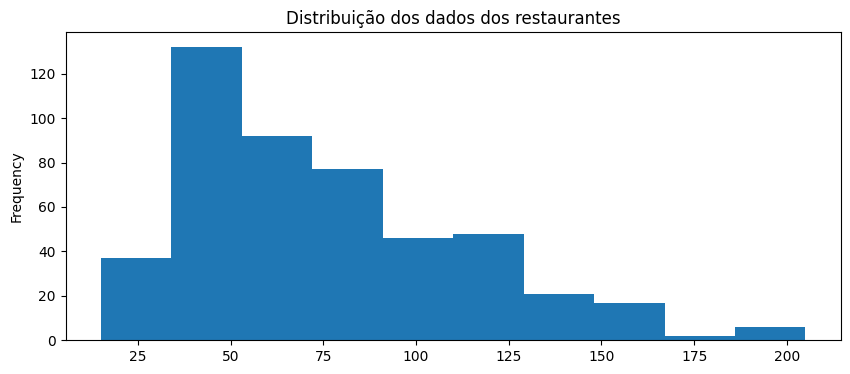

In [93]:
dados['Total'].plot(kind = 'hist', title = 'Distribuição dos dados dos restaurantes', figsize = (10,4));

In [94]:
dados.describe()

,Chimi & Churri,Assa Frão,Total
count,478.000000,478.000000,478.000000
mean,37.451883,37.679916,75.131799
std,21.433061,24.619708,37.512896
min,1.000000,3.000000,15.000000
25%,22.250000,19.000000,45.000000
50%,33.000000,30.500000,66.500000
75%,49.000000,50.000000,99.000000
max,128.000000,139.000000,205.000000


In [95]:
from matplotlib import dates

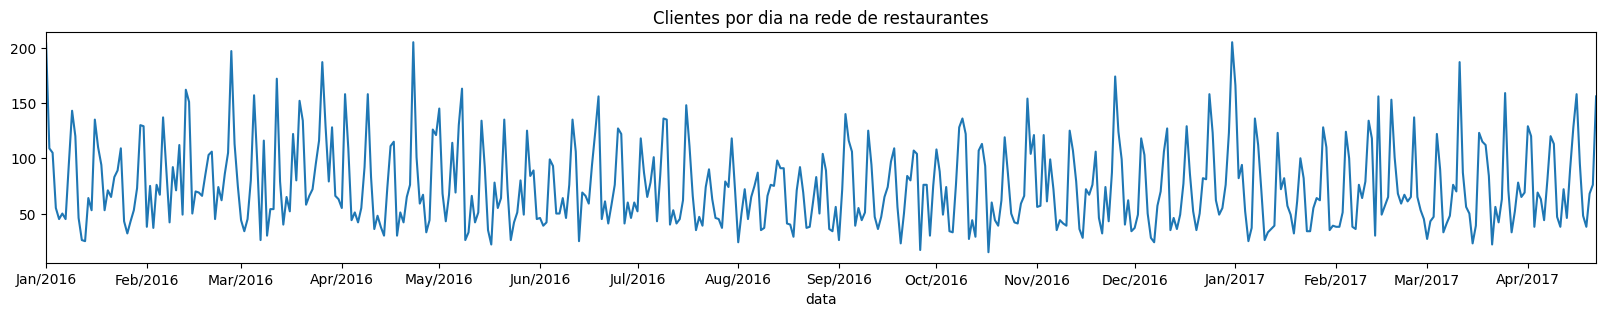

In [96]:
ax = dados['Total'].plot(figsize = (20,3), title = 'Clientes por dia na rede de restaurantes')
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b/%Y'));

### Encontrando a quantidade de clientes mensais

Os dados apresentam a quantidade de clientes por dias nos restaurantes e a partir da visualização da série temporal fica muito difícil entender como está o movimento do restaurante ao longo de cada mês. Vamos fazer um agrupamento dos dados e entender se existe uma diferença significativa da quantidade de clientes em cada mês.

In [97]:
clientes_mensais = dados.resample(rule = 'M')[['Chimi & Churri', 'Assa Frão']].sum()
clientes_mensais

,Chimi & Churri,Assa Frão
data,,
2016-01-31,920,1577
2016-02-29,1109,1396
2016-03-31,1177,1513
2016-04-30,1089,1229
2016-05-31,957,1338
2016-06-30,1262,914
2016-07-31,1299,986
2016-08-31,972,944
2016-09-30,1037,1084


In [98]:
clientes_mensais.index.month_name(locale = 'pt_BR.utf8')

Index(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro', 'Janeiro',
       'Fevereiro', 'Março', 'Abril'],
      dtype='object', name='data')

In [99]:
!locale -a

C
C.utf8
en_US.utf8
POSIX
pt_BR.utf8
pt_PT.utf8


```
!sudo apt-get install language-pack-pt-base
```

In [100]:
#!sudo apt-get install language-pack-pt-base

In [101]:
clientes_mensais['Mês'] = clientes_mensais.index.month_name(locale = 'pt_BR.utf8')
clientes_mensais

,Chimi & Churri,Assa Frão,Mês
data,,,
2016-01-31,920,1577,Janeiro
2016-02-29,1109,1396,Fevereiro
2016-03-31,1177,1513,Março
2016-04-30,1089,1229,Abril
2016-05-31,957,1338,Maio
2016-06-30,1262,914,Junho
2016-07-31,1299,986,Julho
2016-08-31,972,944,Agosto
2016-09-30,1037,1084,Setembro


Cores para o gráfico:

- Azul: `#636EFA`
- Vermelho: `#EF553B`

In [102]:
import matplotlib.ticker as ticker

<ipython-input-103-d537456b9c64>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



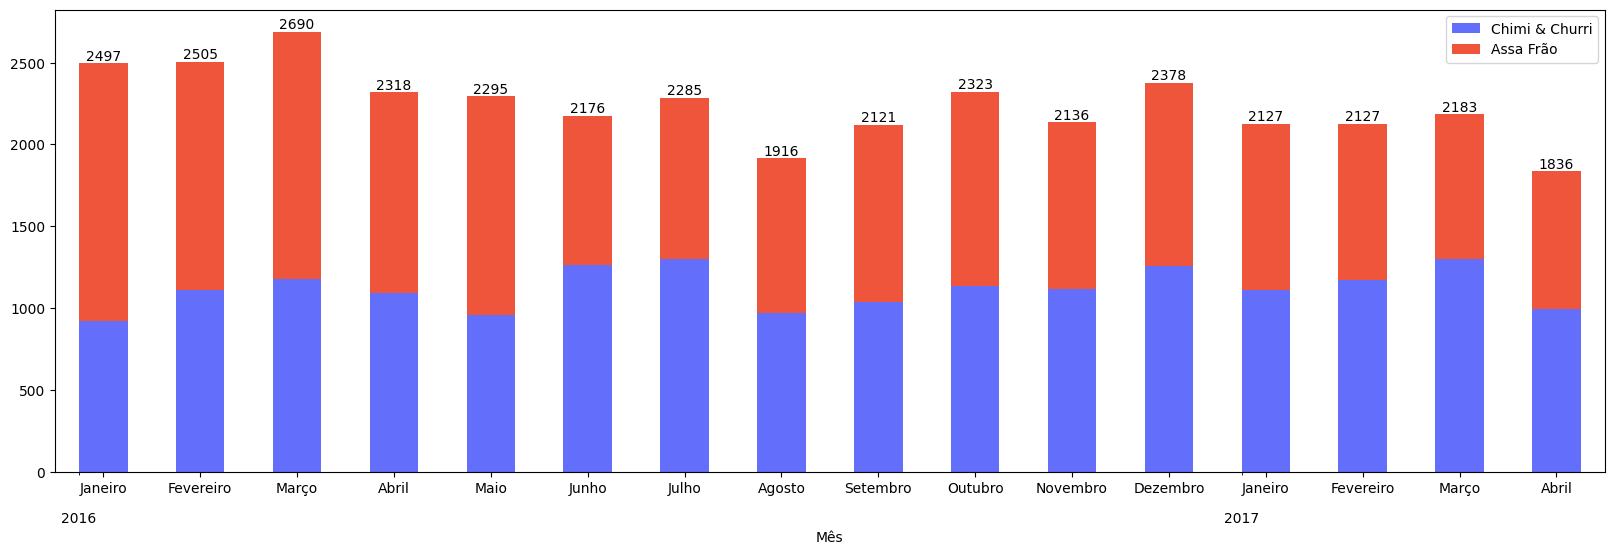

In [103]:
ax = clientes_mensais.plot(x = 'Mês', kind = 'bar', stacked = True, color = ['#636EFA', '#EF553B'], rot = 0, figsize = (20,6))
ax.bar_label(ax.containers[1], fontsize = 10)
ax.xaxis.set_minor_locator(ticker.IndexLocator(12, 0))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(['\n\n2016', '\n\n2017']));

### Extraindo a média móvel

Analisar apenas o gráfico da série temporal para entender as tendências de crescimento ou decrescimento da série temporal pode ser um pouco difícil. Vamos extrair a média móvel da série para entender o comportamento da série temporal ao longo do período.

In [104]:
for restaurante in ['Chimi & Churri', 'Assa Frão']:
    dados[f'{restaurante}_MM7'] = dados[[restaurante]].rolling(7).mean()

In [105]:
dados

,Chimi & Churri,Assa Frão,Total,Chimi & Churri_MM7,Assa Frão_MM7
data,,,,,
2016-01-01,65,139,204,NaN,NaN
2016-01-02,24,85,109,NaN,NaN
2016-01-03,24,81,105,NaN,NaN
2016-01-04,23,32,55,NaN,NaN
2016-01-05,2,43,45,NaN,NaN
...,...,...,...,...,...
2017-04-18,30,18,48,46.285714,44.714286
2017-04-19,20,18,38,42.857143,43.285714
2017-04-20,22,46,68,43.285714,46.000000


In [106]:
import plotly.express as px

In [107]:
px.line(dados,
        x = dados.index,
        y = ['Chimi & Churri_MM7', 'Assa Frão_MM7'],
        width = 1150,
        height = 400,
        title = 'Média móvel de 7 dias da quantidade de clientes na rede de restaurantes')

### Analisando a média móvel como tendência

Conseguimos comparar a média móvel entre os dois restaurantes e entender a diferença entre a tendência de cada um deles. Agora vamos visualizar como se comporta a média móvel em relação a série temporal original.

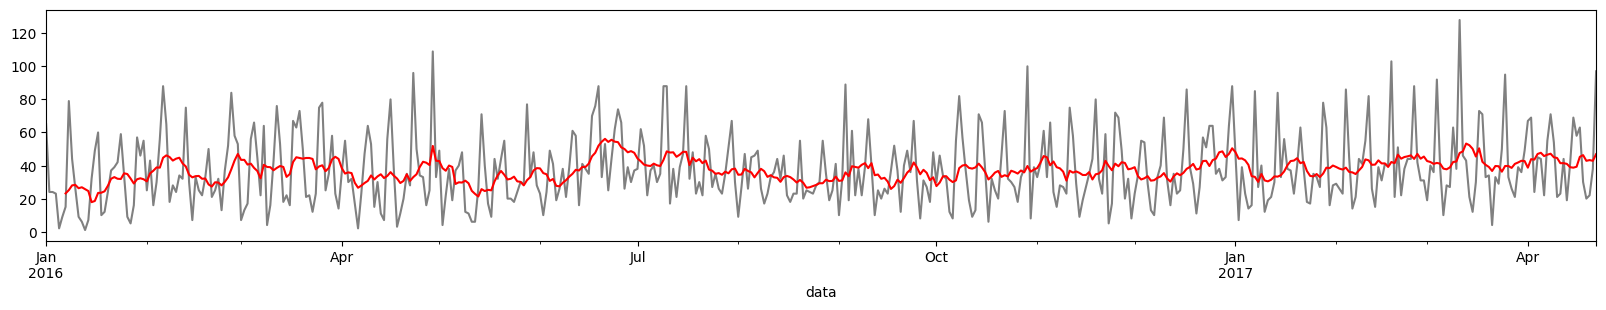

In [108]:
dados['Chimi & Churri'].plot(color = 'gray', figsize = (20,3))
dados['Chimi & Churri_MM7'].plot(color = 'red', figsize = (20,3));

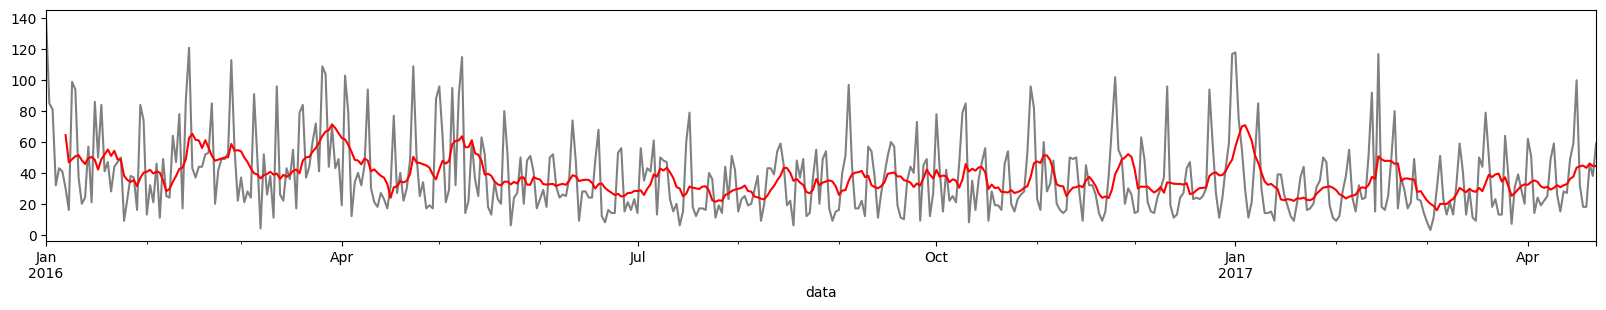

In [109]:
dados['Assa Frão'].plot(color = 'gray', figsize = (20,3))
dados['Assa Frão_MM7'].plot(color = 'red', figsize = (20,3));

## Detectando anomalias

Anomalias são pontos que se comportam de forma diferente ao padrão geral dos dados. Detectar anomalias é muito importante para encontrar possíveis problemas ou pontos de melhoria dentro do negócio.

Vamos procurar por pontos discrepantes e identificar se as datas em que ocorrem são específicas para que algo possa ser feito com base nessa informação.

### Encontrando dia da semana e datas comemorativas

Vamos extrair o nome do dia da semana e fazer a leitura de uma base de dados de datas comemorativas para complementar a informação que temos na base de dados.

In [110]:
dados.index.day_name(locale = 'pt_BR.utf8')

Index(['Sexta', 'Sábado', 'Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta',
       'Sexta', 'Sábado', 'Domingo',
       ...
       'Quinta', 'Sexta', 'Sábado', 'Domingo', 'Segunda', 'Terça', 'Quarta',
       'Quinta', 'Sexta', 'Sábado'],
      dtype='object', name='data', length=478)

In [111]:
dados['Dia da semana'] = dados.index.day_name(locale = 'pt_BR.utf8')

In [112]:
datas_comemorativas = pd.read_csv('/content/datas_comemorativas.csv')
datas_comemorativas

,data,feriado
0,1/1/2016,Ano novo
1,2/14/2016,Dia dos namorados
2,3/25/2016,Sexta-feira santa
3,3/27/2016,Pascoa
4,3/28/2016,Domingo de pascoa
5,5/8/2016,Dia das maes
6,6/19/2016,Dia dos pais
7,10/31/2016,Halloween
8,11/25/2016,Black Friday
9,12/24/2016,Vespera de Natal


In [113]:
datas_comemorativas['data'] = pd.to_datetime(datas_comemorativas['data'])
datas_comemorativas = datas_comemorativas.set_index('data', drop = True)
datas_comemorativas

,feriado
data,
2016-01-01,Ano novo
2016-02-14,Dia dos namorados
2016-03-25,Sexta-feira santa
2016-03-27,Pascoa
2016-03-28,Domingo de pascoa
2016-05-08,Dia das maes
2016-06-19,Dia dos pais
2016-10-31,Halloween
2016-11-25,Black Friday


In [114]:
dados = pd.merge(dados, datas_comemorativas, how = 'left', left_index = True, right_index = True)
dados

,Chimi & Churri,Assa Frão,Total,Chimi & Churri_MM7,Assa Frão_MM7,Dia da semana,feriado
data,,,,,,,
2016-01-01,65,139,204,NaN,NaN,Sexta,Ano novo
2016-01-02,24,85,109,NaN,NaN,Sábado,NaN
2016-01-03,24,81,105,NaN,NaN,Domingo,NaN
2016-01-04,23,32,55,NaN,NaN,Segunda,NaN
2016-01-05,2,43,45,NaN,NaN,Terça,NaN
...,...,...,...,...,...,...,...
2017-04-18,30,18,48,46.285714,44.714286,Terça,NaN
2017-04-19,20,18,38,42.857143,43.285714,Quarta,NaN
2017-04-20,22,46,68,43.285714,46.000000,Quinta,NaN


### Capturando dados discrepantes

Os dados discrepantes serão identificados com base no desvio-padrão dos dados. Caso um valor se afaste muito em relação à média geral dos dados, ele será considerado um valor discrepante.

In [115]:
from scipy.stats import zscore

In [116]:
def detectar_anomalias(coluna):
    dados['zscore'] = zscore(dados[coluna])
    anomalias = dados[(dados['zscore']>3) | (dados['zscore']<-3)]
    return anomalias[[coluna, 'zscore', 'Dia da semana', 'feriado']]

anomalias_chimi_churri = detectar_anomalias('Chimi & Churri')
anomalias_assa_frao = detectar_anomalias('Assa Frão')

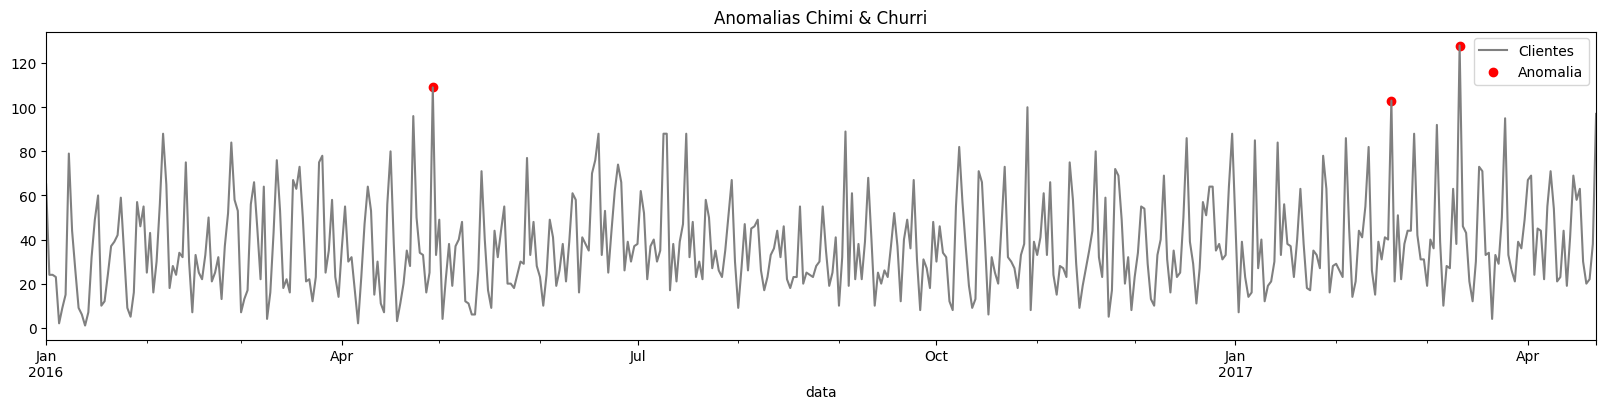

In [117]:
ax = dados['Chimi & Churri'].plot(label = 'Clientes', color = 'gray', figsize = (20,4))
ax.scatter(anomalias_chimi_churri.index.to_pydatetime(), anomalias_chimi_churri['Chimi & Churri'], color = 'red', label = 'Anomalia')
ax.set_title('Anomalias Chimi & Churri')
ax.legend();

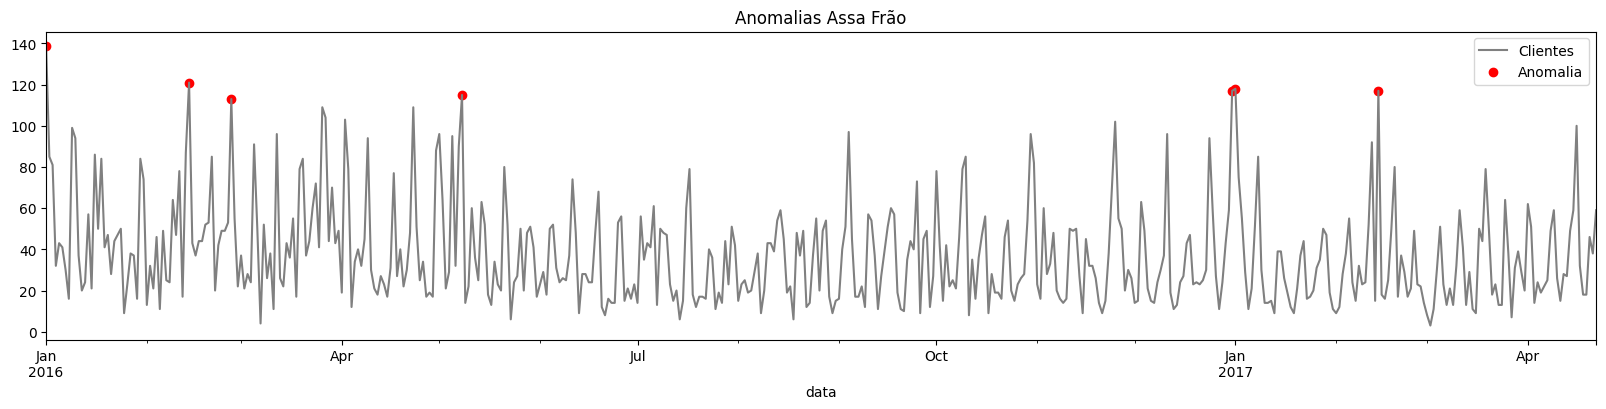

In [118]:
ax = dados['Assa Frão'].plot(label = 'Clientes', color = 'gray', figsize = (20,4))
ax.scatter(anomalias_assa_frao.index.to_pydatetime(), anomalias_assa_frao['Assa Frão'], color = 'red', label = 'Anomalia')
ax.set_title('Anomalias Assa Frão')
ax.legend();

### Descobrindo as datas dos dados discrepantes

In [119]:
print('Anomalias para o Chimi & Churri')
display(anomalias_chimi_churri)
print('\n\n')
print('Anomalias para o Assa Frão')
display(anomalias_assa_frao)

Anomalias para o Chimi & Churri


,Chimi & Churri,zscore,Dia da semana,feriado
data,,,,
2016-04-29,109,3.341710,Sexta,NaN
2017-02-18,103,3.061475,Sábado,NaN
2017-03-11,128,4.229120,Sábado,NaN





Anomalias para o Assa Frão


,Assa Frão,zscore,Dia da semana,feriado
data,,,,
2016-01-01,139,4.119717,Sexta,Ano novo
2016-02-14,121,3.387830,Domingo,Dia dos namorados
2016-02-27,113,3.062546,Sábado,NaN
2016-05-08,115,3.143867,Domingo,Dia das maes
2016-12-31,117,3.225188,Sábado,Vespera de ano novo
2017-01-01,118,3.265848,Domingo,Ano novo
2017-02-14,117,3.225188,Terça,Dia dos namorados


### Visualizando a autocorrelação

In [120]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Autocorrelação Chimi & Churri')

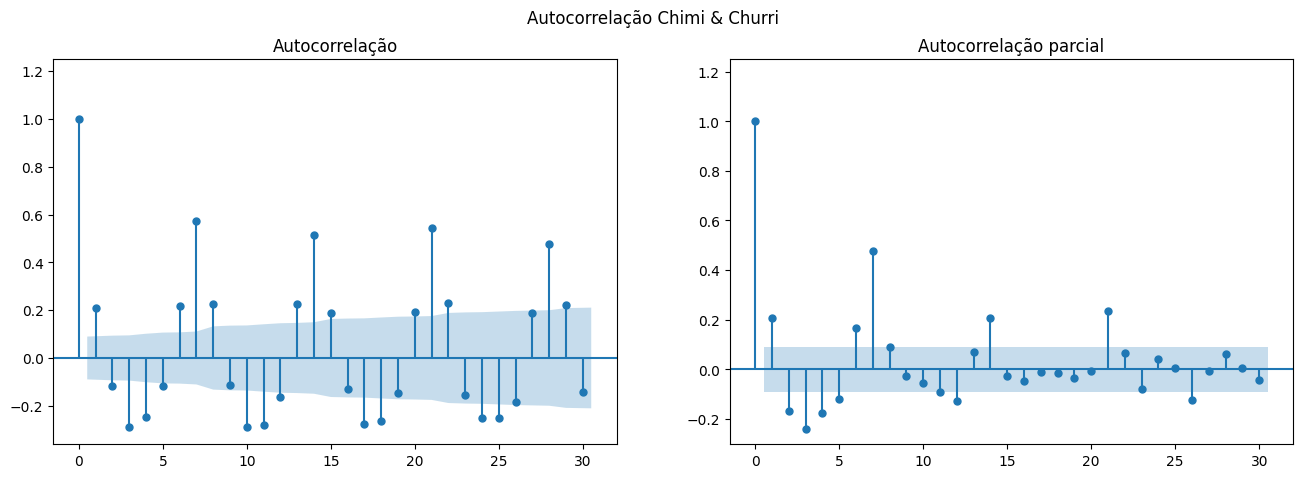

In [121]:
fig, axes = plt.subplots(1, 2, figsize = (16,5))
plot_acf(dados['Chimi & Churri'], lags = 30, title = 'Autocorrelação', auto_ylims = True, ax = axes[0])
plot_pacf(dados['Chimi & Churri'], lags = 30, title = 'Autocorrelação parcial', auto_ylims = True, ax = axes[1])
plt.suptitle('Autocorrelação Chimi & Churri')

Text(0.5, 0.98, 'Autocorrelação Assa Frão')

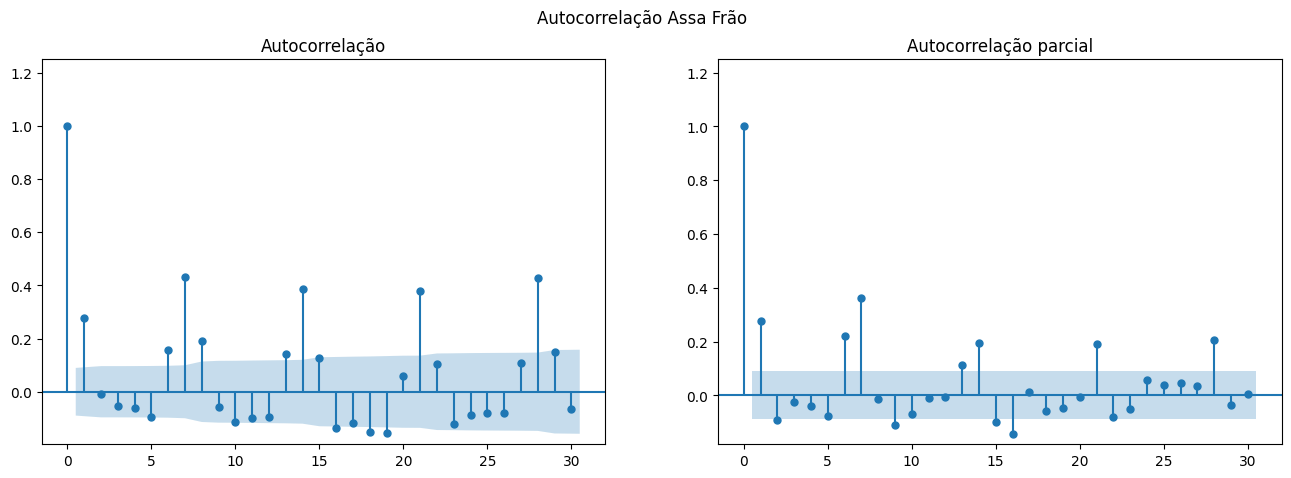

In [122]:
fig, axes = plt.subplots(1, 2, figsize = (16,5))
plot_acf(dados['Assa Frão'], lags = 30, title = 'Autocorrelação', auto_ylims = True, ax = axes[0])
plot_pacf(dados['Assa Frão'], lags = 30, title = 'Autocorrelação parcial', auto_ylims = True, ax = axes[1])
plt.suptitle('Autocorrelação Assa Frão')

## Decomposição de uma série temporal

### Decompondo uma série de tempo

In [123]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [124]:
decomposicao_chimi_churri = seasonal_decompose(dados['Chimi & Churri'])

In [125]:
decomposicao_chimi_churri.trend

data
2016-01-01          NaN
2016-01-02          NaN
2016-01-03          NaN
2016-01-04    23.142857
2016-01-05    25.142857
                ...    
2017-04-18    42.857143
2017-04-19    46.857143
2017-04-20          NaN
2017-04-21          NaN
2017-04-22          NaN
Name: trend, Length: 478, dtype: float64

In [126]:
decomposicao_chimi_churri.seasonal

data
2016-01-01     8.129889
2016-01-02    32.114964
2016-01-03     4.912405
2016-01-04   -11.868229
2016-01-05   -10.796801
                ...    
2017-04-18   -10.796801
2017-04-19   -13.214868
2017-04-20    -9.277360
2017-04-21     8.129889
2017-04-22    32.114964
Name: seasonal, Length: 478, dtype: float64

In [127]:
decomposicao_chimi_churri.resid

data
2016-01-01          NaN
2016-01-02          NaN
2016-01-03          NaN
2016-01-04    11.725372
2016-01-05   -12.346056
                ...    
2017-04-18    -2.060342
2017-04-19   -13.642275
2017-04-20          NaN
2017-04-21          NaN
2017-04-22          NaN
Name: resid, Length: 478, dtype: float64

### Visualizando a decomposição da série temporal

In [128]:
def plot_decomposicao(decomposicao, title):
    fig, axes = plt.subplots(ncols = 1, nrows = 4, sharex=True,figsize = (20, 8))
    decomposicao.observed.plot(ax = axes[0], title = 'Dados observados')
    decomposicao.trend.plot(ax = axes[1], title = 'Tendência')
    decomposicao.seasonal.plot(ax = axes[2], title = 'Sazonalidade')
    decomposicao.resid.plot(ax = axes[3], title = 'Resíduos')
    fig.suptitle(title)
    plt.show()

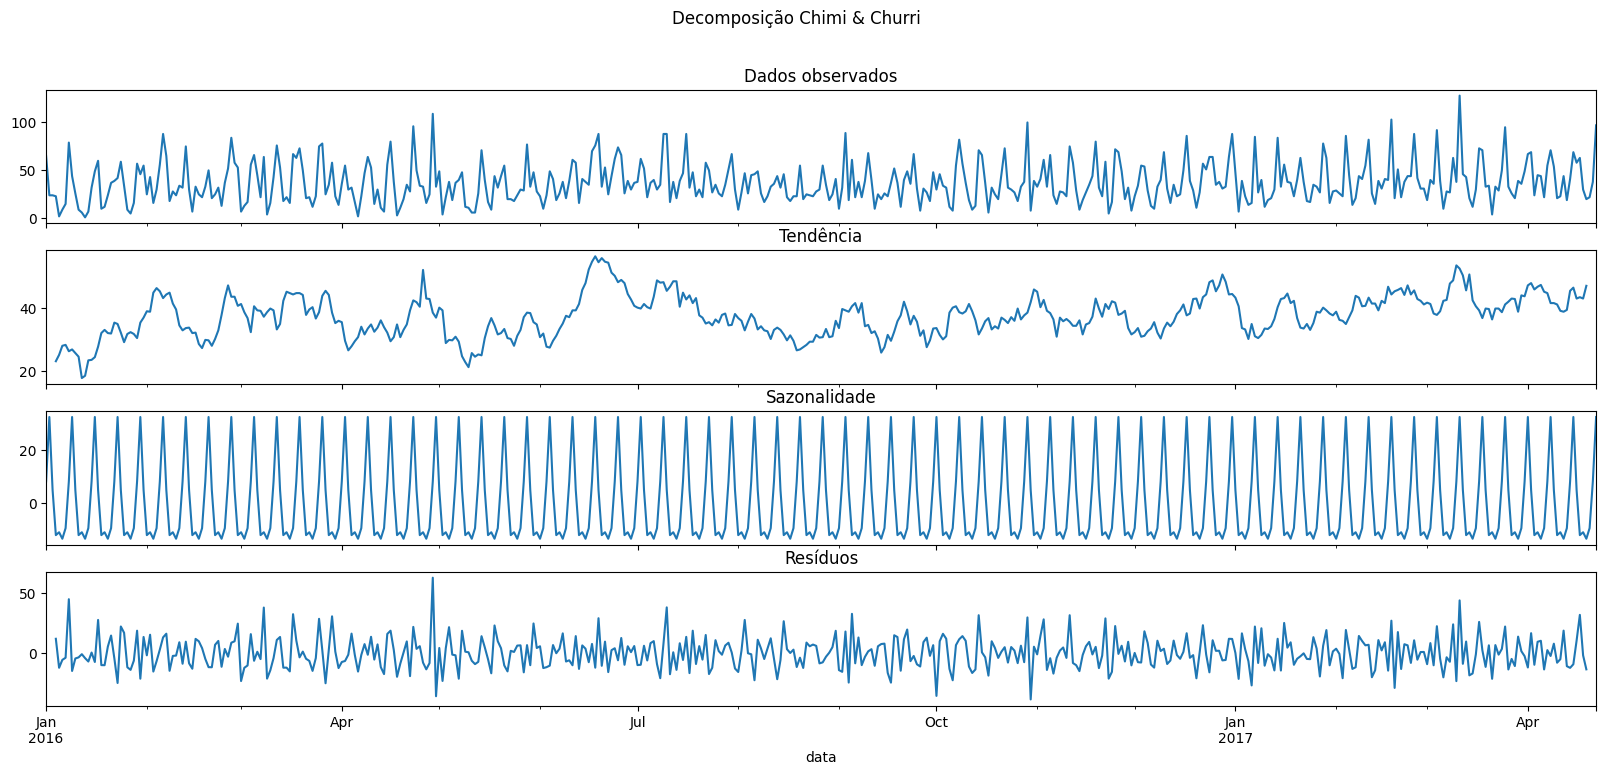

In [129]:
plot_decomposicao(decomposicao_chimi_churri, 'Decomposição Chimi & Churri')

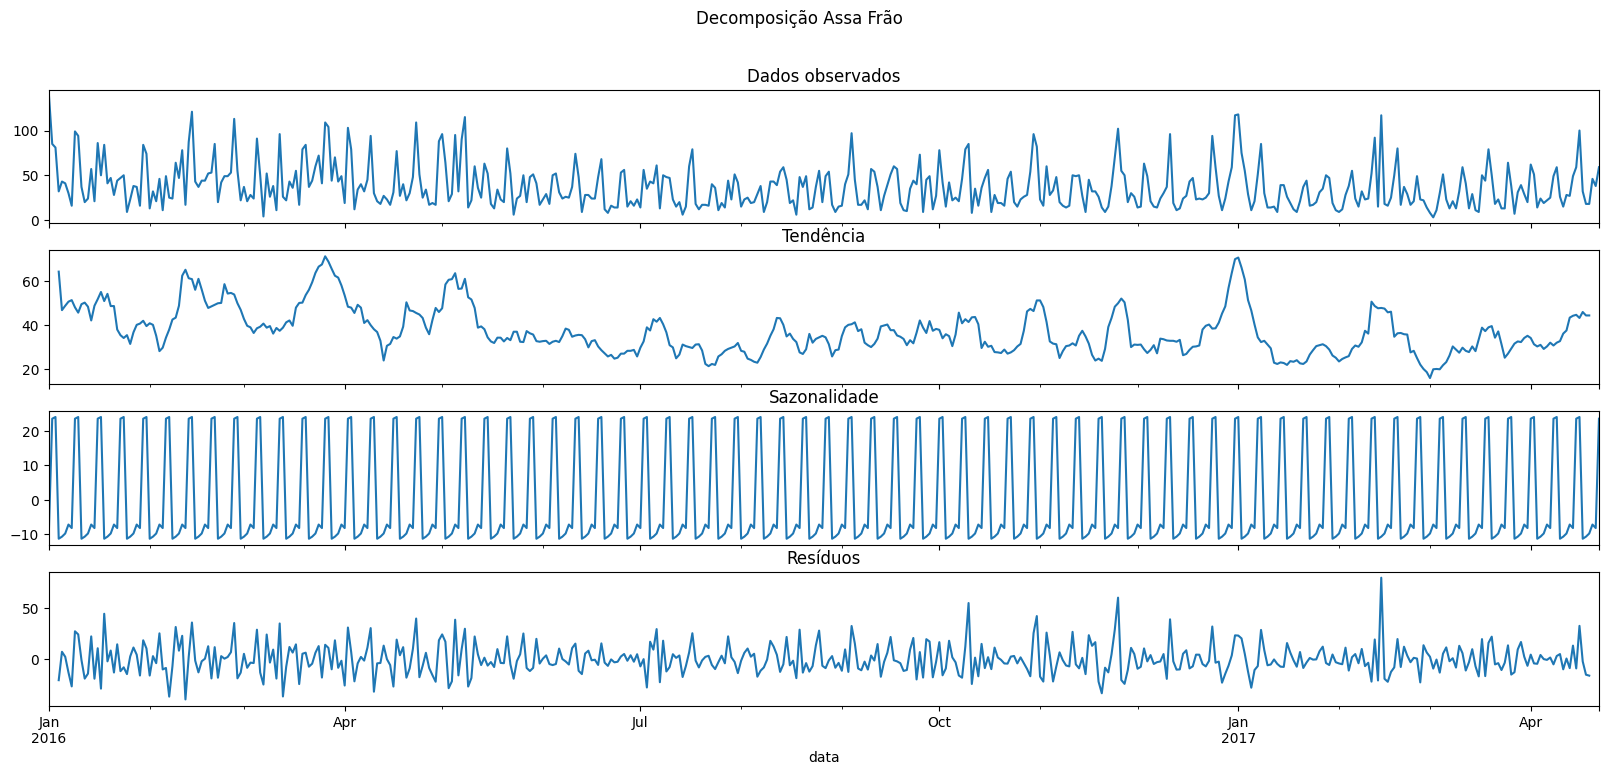

In [130]:
decomposicao_assa_frao = seasonal_decompose(dados['Assa Frão'])
plot_decomposicao(decomposicao_assa_frao, 'Decomposição Assa Frão')

### Checando anomalias de acordo com resíduos

In [131]:
import numpy as np

In [132]:
anomalias_resid_chimi_churri = np.where(np.abs(decomposicao_chimi_churri.resid) > 2.5*np.std(decomposicao_chimi_churri.resid))
anomalias_resid_chimi_churri

(array([  7,  67, 119, 120, 191, 274, 303, 435]),)

In [133]:
anomalias_resid_chimi_churri = dados.iloc[anomalias_resid_chimi_churri][['Chimi & Churri', 'Dia da semana', 'feriado']]
anomalias_resid_chimi_churri

,Chimi & Churri,Dia da semana,feriado
data,,,
2016-01-08,79,Sexta,NaN
2016-03-08,64,Terça,NaN
2016-04-29,109,Sexta,NaN
2016-04-30,33,Sábado,NaN
2016-07-10,88,Domingo,NaN
2016-10-01,30,Sábado,NaN
2016-10-30,8,Domingo,NaN
2017-03-11,128,Sábado,NaN


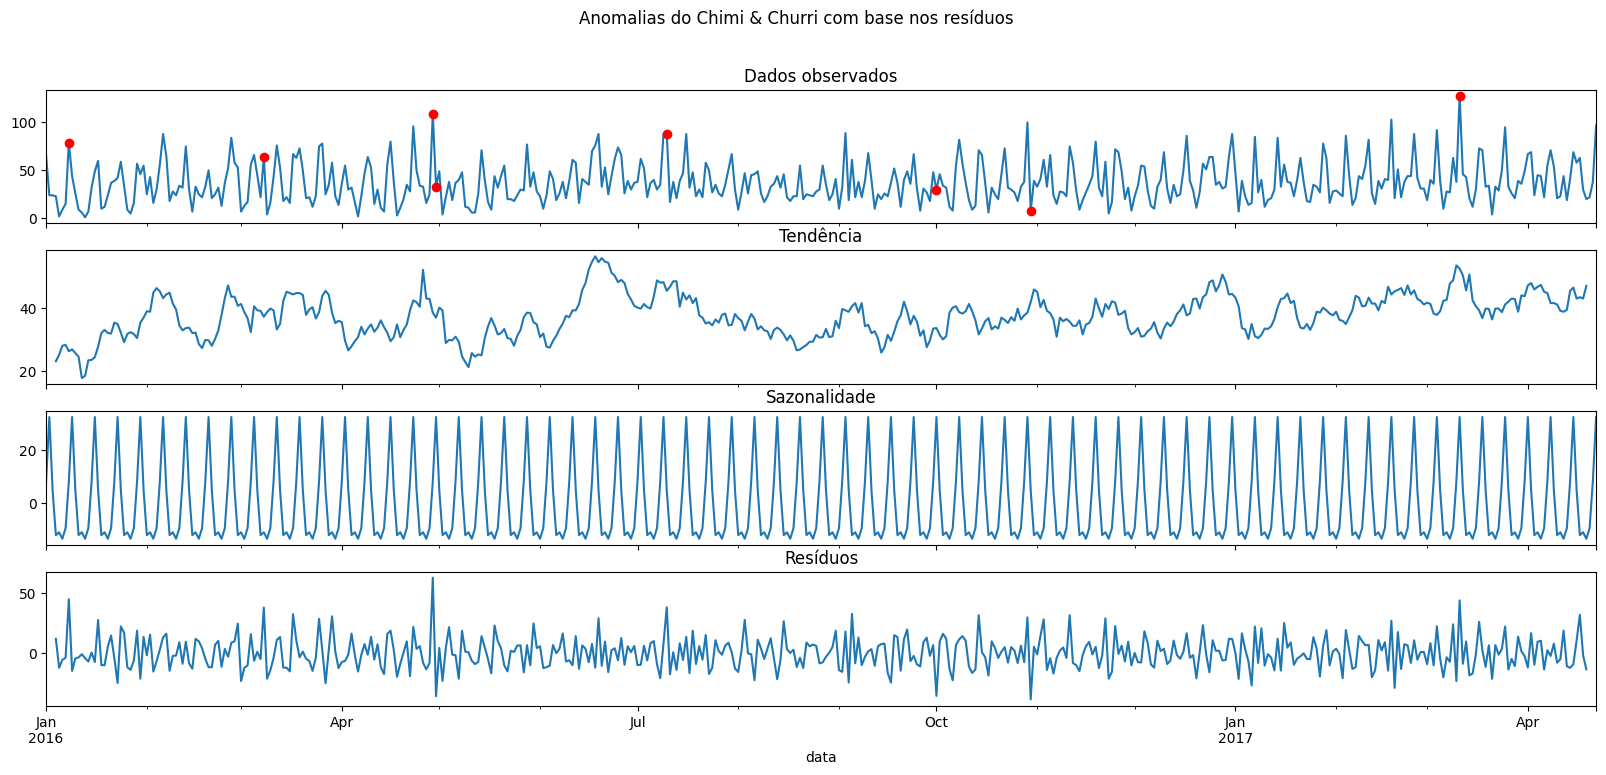

In [134]:
fig, axes = plt.subplots(ncols = 1, nrows = 4, sharex=True,figsize = (20, 8))
decomposicao_chimi_churri.observed.plot(ax = axes[0], title = 'Dados observados')
axes[0].plot(anomalias_resid_chimi_churri.index, anomalias_resid_chimi_churri['Chimi & Churri'], color = 'red', marker = 'o', linestyle = '', label = 'Anomalias')
decomposicao_chimi_churri.trend.plot(ax = axes[1], title = 'Tendência')
decomposicao_chimi_churri.seasonal.plot(ax = axes[2], title = 'Sazonalidade')
decomposicao_chimi_churri.resid.plot(ax = axes[3], title = 'Resíduos')
fig.suptitle('Anomalias do Chimi & Churri com base nos resíduos')
plt.show()

In [135]:
anomalias_resid_assa_frao = np.where(np.abs(decomposicao_assa_frao.resid) > 2.5*np.std(decomposicao_assa_frao.resid))
anomalias_resid_assa_frao = dados.iloc[anomalias_resid_assa_frao][['Assa Frão', 'Dia da semana', 'feriado']]

In [136]:
anomalias_resid_assa_frao

,Assa Frão,Dia da semana,feriado
data,,,
2016-01-18,84,Segunda,NaN
2016-02-12,17,Sexta,NaN
2016-04-23,109,Sábado,NaN
2016-05-05,95,Quinta,NaN
2016-10-10,85,Segunda,NaN
2016-10-31,82,Segunda,Halloween
2016-11-25,102,Sexta,Black Friday
2016-12-11,96,Domingo,NaN
2017-02-14,117,Terça,Dia dos namorados


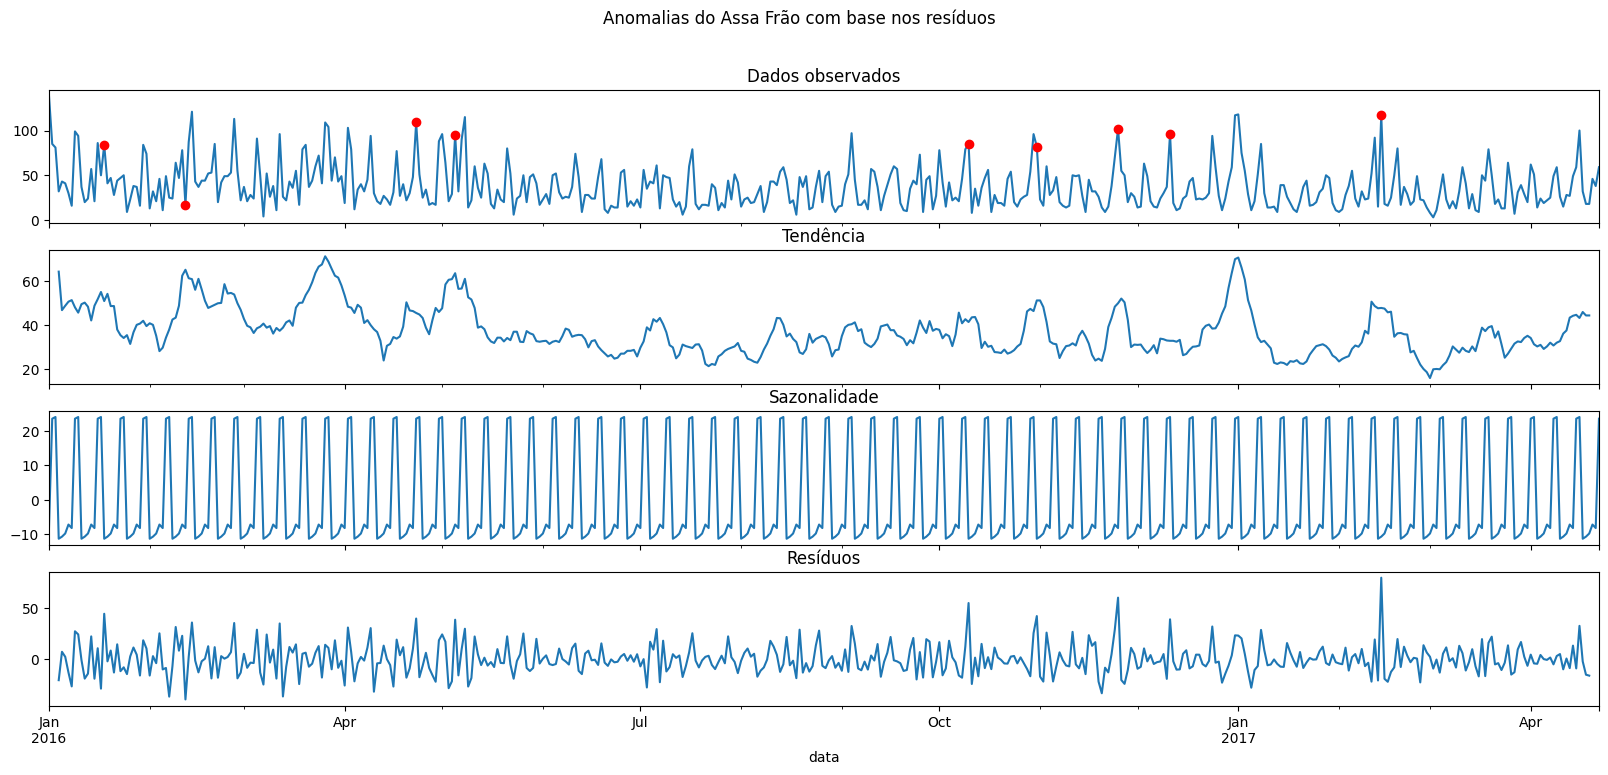

In [137]:
fig, axes = plt.subplots(ncols = 1, nrows = 4, sharex=True,figsize = (20, 8))
decomposicao_assa_frao.observed.plot(ax = axes[0], title = 'Dados observados')
axes[0].plot(anomalias_resid_assa_frao.index, anomalias_resid_assa_frao['Assa Frão'], color = 'red', marker = 'o', linestyle = '', label = 'Anomalias')
decomposicao_assa_frao.trend.plot(ax = axes[1], title = 'Tendência')
decomposicao_assa_frao.seasonal.plot(ax = axes[2], title = 'Sazonalidade')
decomposicao_assa_frao.resid.plot(ax = axes[3], title = 'Resíduos')
fig.suptitle('Anomalias do Assa Frão com base nos resíduos')
plt.show()

## Fazendo previsões de séries temporais

### Prevendo novos valores

In [138]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [139]:
modelo_chimi_churri = ExponentialSmoothing(dados['Chimi & Churri'], seasonal = 'additive', seasonal_periods = 7, freq = 'D')
resultado_chimi_churri = modelo_chimi_churri.fit()
previsao_chimi_churri = resultado_chimi_churri.forecast(steps = 14)

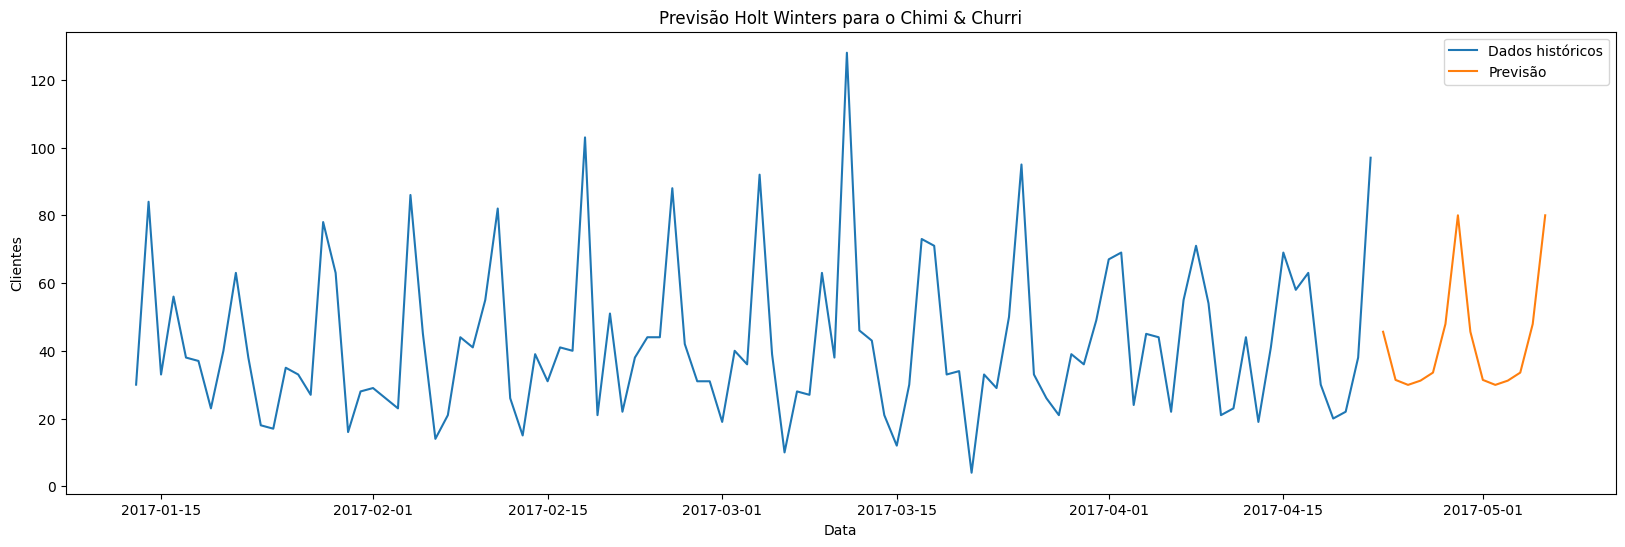

In [140]:
plt.figure(figsize = (20,6))
plt.plot(dados['Chimi & Churri'].index[-100:], dados['Chimi & Churri'].values[-100:], label = 'Dados históricos')
plt.plot(previsao_chimi_churri.index, previsao_chimi_churri.values, label = 'Previsão')
plt.title('Previsão Holt Winters para o Chimi & Churri')
plt.xlabel('Data')
plt.ylabel('Clientes')
plt.legend();

In [141]:
modelo_assa_frao = ExponentialSmoothing(dados['Assa Frão'], seasonal = 'additive', seasonal_periods = 7, freq = 'D')
resultado_assa_frao = modelo_assa_frao.fit()
previsao_assa_frao = resultado_assa_frao.forecast(steps = 14)

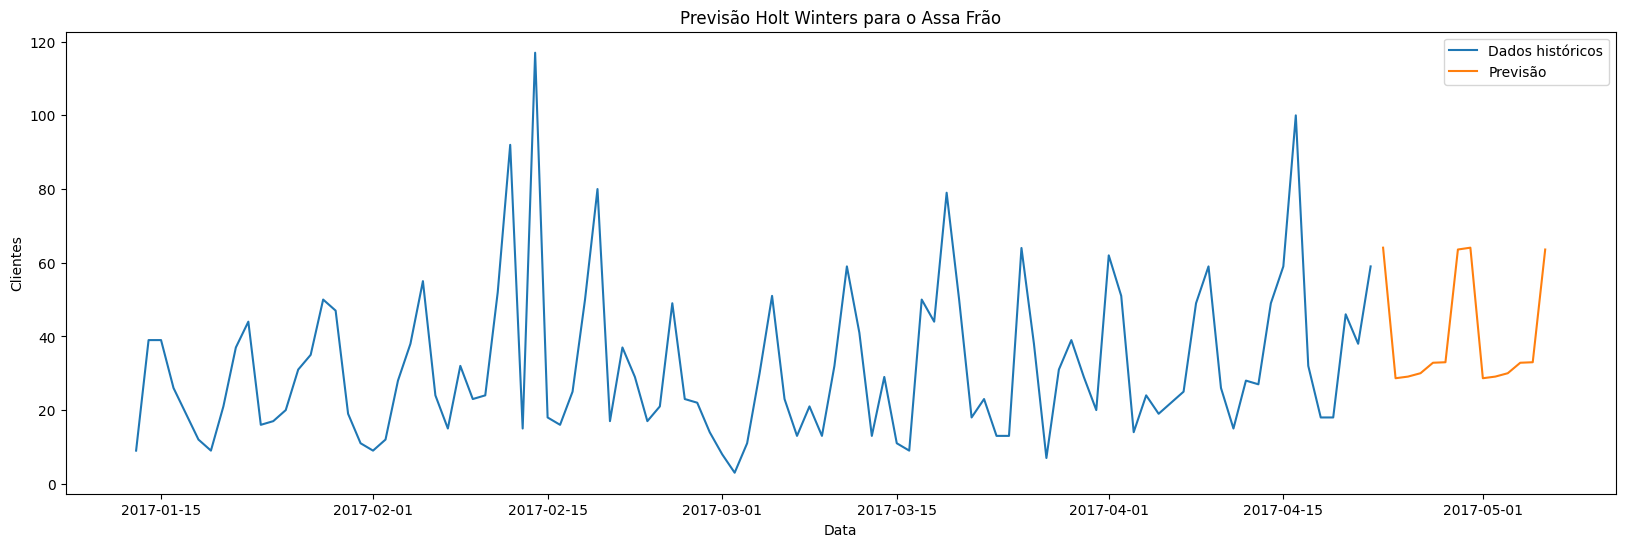

In [143]:
plt.figure(figsize = (20,6))
plt.plot(dados['Assa Frão'].index[-100:], dados['Assa Frão'].values[-100:], label = 'Dados históricos')
plt.plot(previsao_assa_frao.index, previsao_assa_frao.values, label = 'Previsão')
plt.title('Previsão Holt Winters para o Assa Frão')
plt.xlabel('Data')
plt.ylabel('Clientes')
plt.legend();

### Sumarizando as previsões

In [144]:
tabela_previsao = pd.DataFrame()
tabela_previsao.index = previsao_chimi_churri.index
tabela_previsao['Previsão Chimi & Churri'] = previsao_chimi_churri.values
tabela_previsao['Previsão Assa Frão'] = previsao_assa_frao.values
tabela_previsao

,Previsão Chimi & Churri,Previsão Assa Frão
2017-04-23,45.615042,64.083659
2017-04-24,31.404129,28.646837
2017-04-25,29.933185,29.092343
2017-04-26,31.187987,30.008440
2017-04-27,33.558200,32.851045
2017-04-28,47.912801,32.986936
2017-04-29,80.001121,63.585406
2017-04-30,45.615042,64.083659
2017-05-01,31.404129,28.646837
2017-05-02,29.933185,29.092343


In [145]:
tabela_previsao = tabela_previsao.astype(int)
tabela_previsao

,Previsão Chimi & Churri,Previsão Assa Frão
2017-04-23,45,64
2017-04-24,31,28
2017-04-25,29,29
2017-04-26,31,30
2017-04-27,33,32
2017-04-28,47,32
2017-04-29,80,63
2017-04-30,45,64
2017-05-01,31,28
2017-05-02,29,29


In [146]:
tabela_previsao.to_excel('Tabela previsao para os próximos 14 dias.xlsx')